# Comparison with UMAP and t-SNE
For these expiments the TSNE package from sklearn and the umap-learn package were used.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from mpl_toolkits.mplot3d import Axes3D
import itertools
import os
import pickle
import scipy
from sklearn.metrics import adjusted_rand_score, accuracy_score
import csv
import math
import time
from utils import logres_scores
from sklearn.manifold import TSNE
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(8,8)})

from matplotlib.lines import Line2D

In [25]:
colors = [[0.25904729, 0.04463962, 0.63248474] ,   # Colors used in other plots, for consistency)
[0.19226212, 0.54367061, 0.01738774] ,
[0.23374056, 0.04293554, 0.00592889] ,
[0.95359512, 0.56287498, 0.36285677] ,
[0.48724396, 0.04591834, 0.5866799] ,
[0.93954392, 0.43401672, 0.7724762] ,
[0.76943513, 0.08379955, 0.54096396] ,
[0.76336115, 0.87187717, 0.71205457] ,
[0.34693552, 0.78004129, 0.53339561] ,
[0.60523262, 0.34021104, 0.78956335]]

### t-SNE

Analyzing dataset of 5 genes: 
Analyzing dataset of 25 genes: 
Analyzing dataset of 50 genes: 
Analyzing dataset of 150 genes: 
Analyzing dataset of 250 genes: 


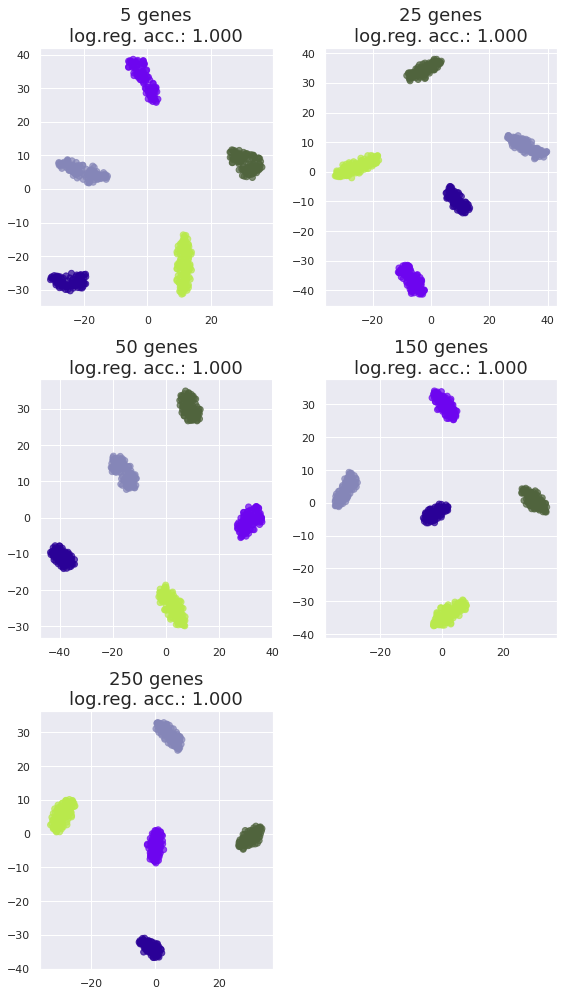

In [10]:
scores_TSNE = []
i=0
colors = [np.random.uniform(size=3) for i in range(10)]
fig = plt.figure(figsize=(8,14))
for num_dims in [5,25, 50,150, 250]:
    print('Analyzing dataset of %i genes: '%num_dims)
    with open('./splattersets/splatter_small_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_small_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw = np.array(list(text))
    data = np.log(data+1)
    N,D = np.shape(data)
    labels = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    
    embedding = TSNE(n_components=2).fit_transform(data)
    
    preds, acc, ari = logres_scores(embedding, labels, np.ones(N), K=5)
    ax = fig.add_subplot(3,2,i+1)
    rgba_cols = 0.7*np.ones((N,4))
    for k_i in set(labels):
        mask = labels == k_i
        mask2 = labels == preds
        mask3 = labels != preds
        rgba_cols[mask,:3] = colors[int(k_i)]
        
        ax.scatter(embedding[mask*mask2,0],embedding[mask*mask2,1], c=rgba_cols[mask*mask2,:])
        ax.scatter(embedding[mask*mask3,0],embedding[mask*mask3,1], c=rgba_cols[mask*mask3,:], marker='*')

    ax.set_title('%i genes\nlog.reg. acc.: %.3f'%(num_dims, acc), fontsize=18)

    i+=1
fig.tight_layout()
plt.savefig('TSNE_simple.png')
plt.show()

Analyzing dataset of 5 genes: 


/home/tobias/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analyzing dataset of 25 genes: 
Analyzing dataset of 50 genes: 
Analyzing dataset of 150 genes: 
Analyzing dataset of 250 genes: 


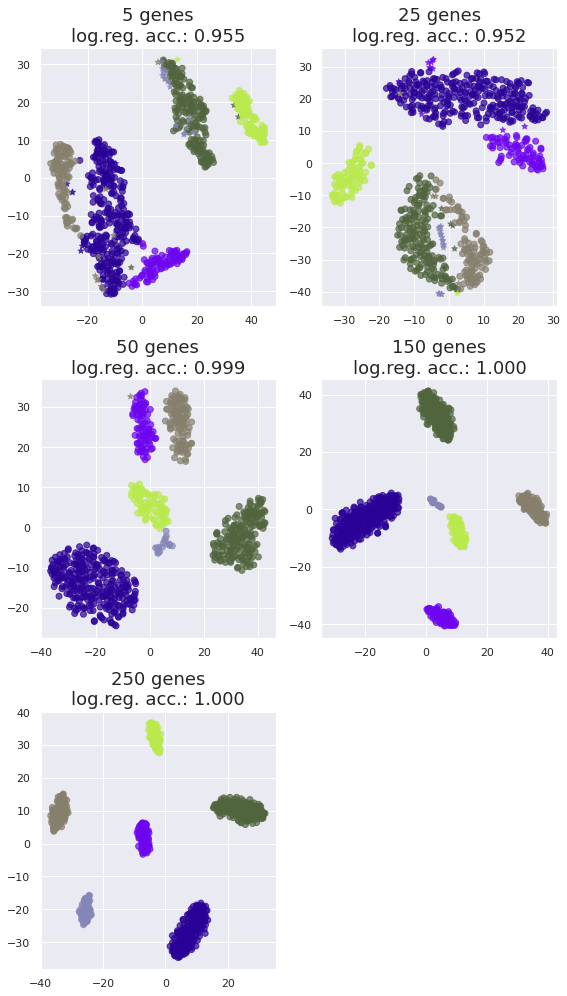

In [11]:
scores_TSNE = []
i=0
fig = plt.figure(figsize=(8,14))
for num_dims in [5,25, 50,150, 250]:
    print('Analyzing dataset of %i genes: '%num_dims)
    with open('./splattersets/splatter_big_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_big_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw = np.array(list(text))
    data = np.log(data+1)
    N,D = np.shape(data)
    labels = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    
    embedding = TSNE(n_components=2).fit_transform(data)
    preds, acc, ari = logres_scores(embedding, labels, np.ones(N), K=5)
    ax = fig.add_subplot(3,2,i+1)
    rgba_cols = 0.7*np.ones((N,4))
    for k_i in set(labels):
        mask = labels == k_i
        mask2 = labels == preds
        mask3 = labels != preds
        rgba_cols[mask,:3] = colors[int(k_i)]
        
        ax.scatter(embedding[mask*mask2,0],embedding[mask*mask2,1], c=rgba_cols[mask*mask2,:])
        ax.scatter(embedding[mask*mask3,0],embedding[mask*mask3,1], c=rgba_cols[mask*mask3,:], marker='*')

    ax.set_title('%i genes\nlog.reg. acc.: %.3f'%(num_dims, acc), fontsize=18)

    i+=1
fig.tight_layout()
plt.savefig('TSNE_complex.png')
plt.show()

### UMAP

Analyzing dataset of 5 genes: 
Analyzing dataset of 25 genes: 
Analyzing dataset of 50 genes: 
Analyzing dataset of 150 genes: 
Analyzing dataset of 250 genes: 


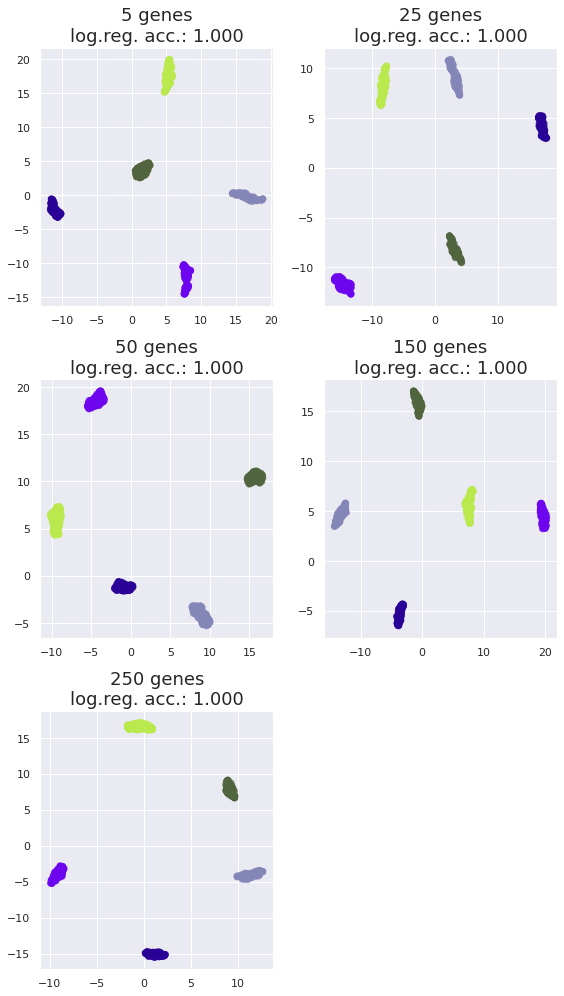

In [13]:
scores_UMAP2 = []
i=0
fig = plt.figure(figsize=(8,14))
for num_dims in [5,25, 50,150, 250]:
    print('Analyzing dataset of %i genes: '%num_dims)
    with open('./splattersets/splatter_small_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_small_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw = np.array(list(text))
    data = np.log(data+1)
    N,D = np.shape(data)
    labels = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    labelnames = ['gene '+str(i+1) for i in set(labels)]
    
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data)
    preds, acc, ari = logres_scores(embedding, labels, np.ones(N), K=5)
    ax = fig.add_subplot(3,2,i+1)
    rgba_cols = 0.7*np.ones((N,4))
    for k_i in set(labels):
        mask = labels == k_i
        mask2 = labels == preds
        mask3 = labels != preds
        rgba_cols[mask,:3] = colors[int(k_i)]
        
        ax.scatter(embedding[mask*mask2,0],embedding[mask*mask2,1], c=rgba_cols[mask*mask2,:])
        ax.scatter(embedding[mask*mask3,0],embedding[mask*mask3,1], c=rgba_cols[mask*mask3,:], marker='*')

    ax.set_title('%i genes\nlog.reg. acc.: %.3f'%(num_dims, acc), fontsize=18)

    i+=1
fig.tight_layout()
plt.savefig('UMAP_simple.png')
plt.show()

Analyzing dataset of 5 genes: 
Analyzing dataset of 25 genes: 
Analyzing dataset of 50 genes: 
Analyzing dataset of 150 genes: 
Analyzing dataset of 250 genes: 


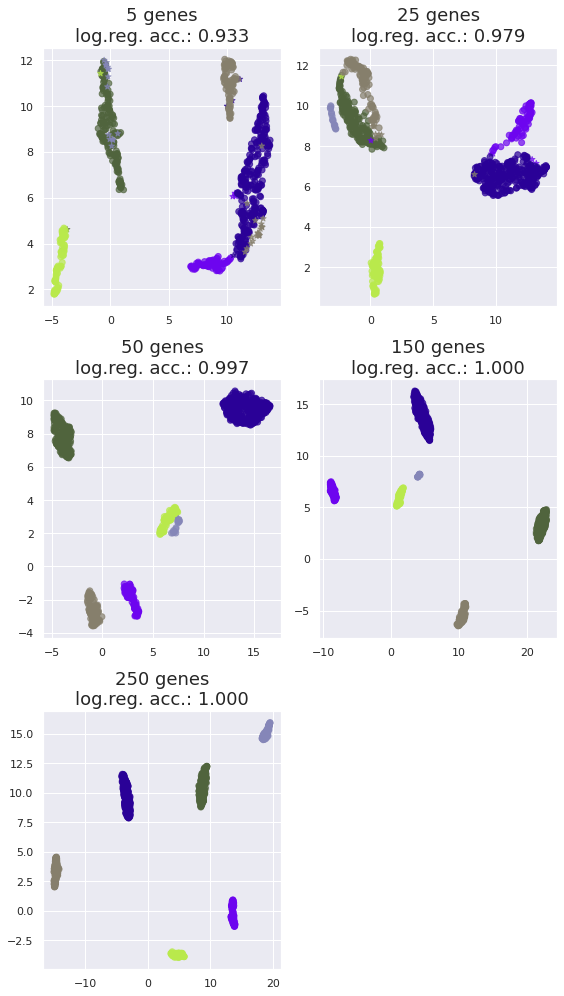

In [12]:
scores_UMAP2 = []
i=0
fig = plt.figure(figsize=(8,14))
for num_dims in [5,25, 50,150, 250]:
    print('Analyzing dataset of %i genes: '%num_dims)
    with open('./splattersets/splatter_big_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_big_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw = np.array(list(text))
    data = np.log(data+1)
    N,D = np.shape(data)
    labels = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    labelnames = ['gene '+str(i+1) for i in set(labels)]
    
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data)
    preds, acc, ari = logres_scores(embedding, labels, np.ones(N), K=5)
    ax = fig.add_subplot(3,2,i+1)
    rgba_cols = 0.7*np.ones((N,4))
    for k_i in set(labels):
        mask = labels == k_i
        mask2 = labels == preds
        mask3 = labels != preds
        rgba_cols[mask,:3] = colors[int(k_i)]
        
        ax.scatter(embedding[mask*mask2,0],embedding[mask*mask2,1], c=rgba_cols[mask*mask2,:])
        ax.scatter(embedding[mask*mask3,0],embedding[mask*mask3,1], c=rgba_cols[mask*mask3,:], marker='*')

    ax.set_title('%i genes\nlog.reg. acc.: %.3f'%(num_dims, acc), fontsize=18)

    i+=1
fig.tight_layout()
plt.savefig('UMAP_complex.png')
plt.show()

### UMAP (extended plot)

Analyzing dataset of 5 genes: 
Analyzing dataset of 25 genes: 
Analyzing dataset of 50 genes: 
Analyzing dataset of 150 genes: 
Analyzing dataset of 250 genes: 


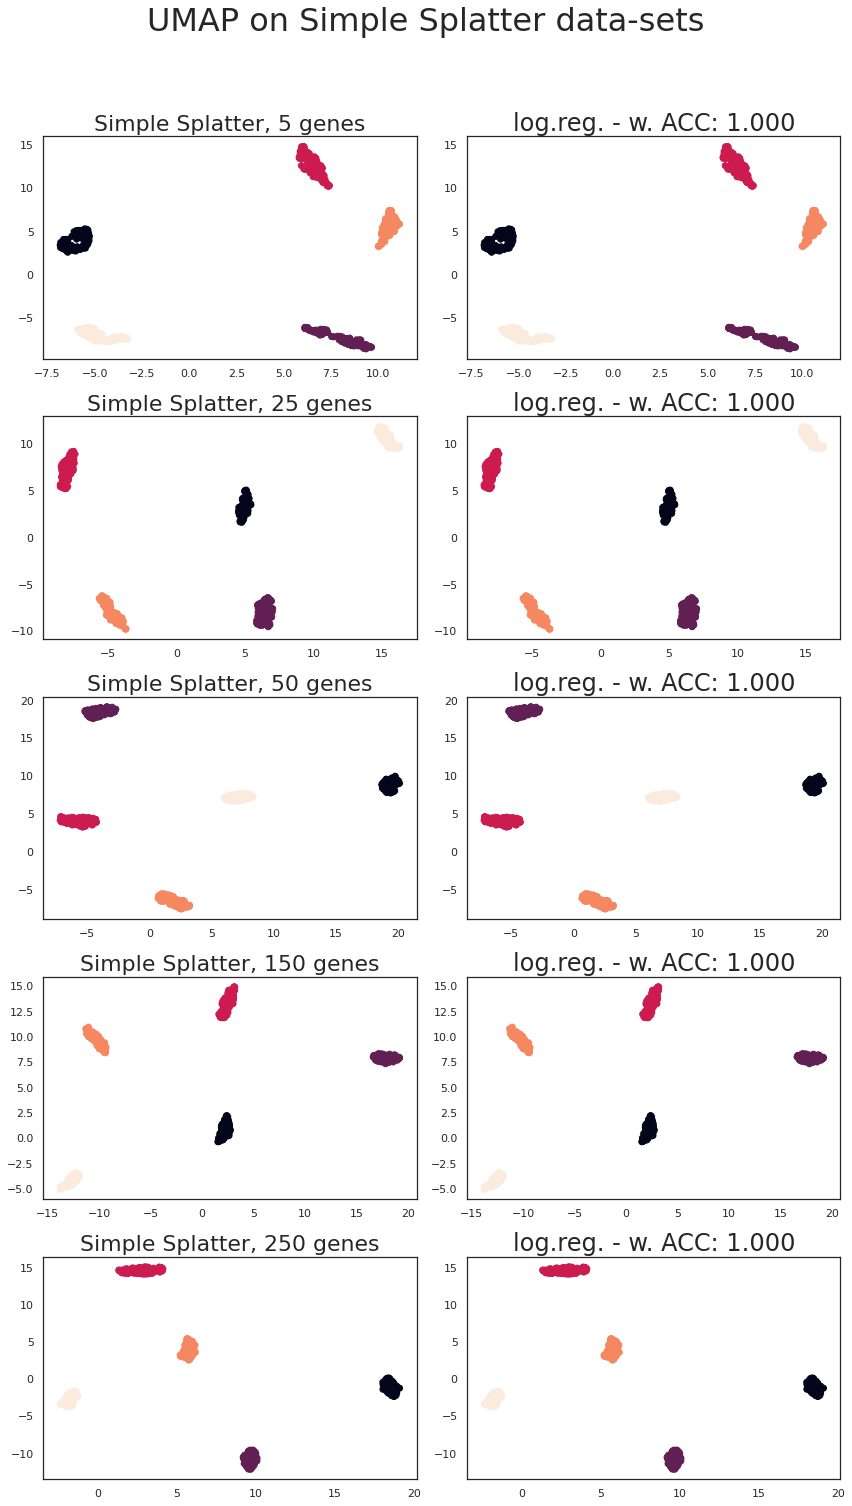

In [2]:
fig = plt.figure(figsize=(12,22))
scores_UMAP = []
i = 0
for num_dims in [5,25, 50,150, 250]:
    print('Analyzing dataset of %i genes: '%num_dims)
    with open('./splattersets/splatter_small_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_small_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw = np.array(list(text))
    data = np.log(data+1)
    N,D = np.shape(data)
    labels = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    labelnames = ['gene '+str(i+1) for i in set(labels)]
    
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data)
    ax = fig.add_subplot(5,2,2*i+1)
    ax.scatter(embedding[:, 0], embedding[:, 1], c=labels)
    ax.set_title('Simple Splatter, %i genes'%num_dims, fontsize=22)
    
    preds, acc, ari = logres_scores(embedding, labels, np.ones(N), K=5)
    ax = fig.add_subplot(5,2,2*i+2)
    ax.scatter(embedding[:,0],embedding[:,1], c=preds)
    
    ax.set_title('log.reg. - w. ACC: %.3f'%(acc), fontsize=24)
    
    scores_UMAP.append(acc)
    i+=1
fig.suptitle('UMAP on Simple Splatter data-sets', fontsize=32)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('UMAP_simple.png')
plt.show()

## Darmanis data-set

### UMAP

In [20]:
genetypes, data, labels = pickle.load(open('darmanis.pkl', 'rb'))
N,D = np.shape(data)

In [21]:
data = np.log(data+1)
order = np.argsort(-np.std(data, axis=0))
data = data[:,order]

In [22]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[:,:500])

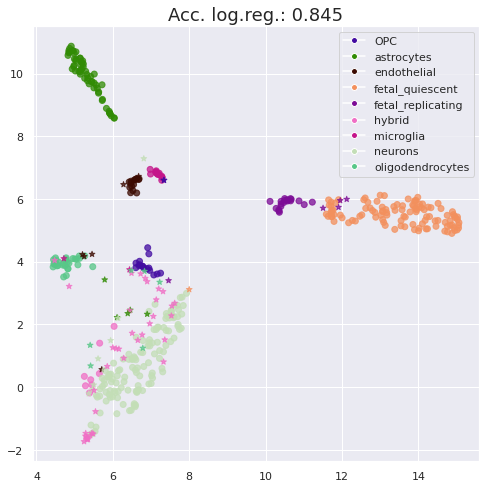

In [26]:
labs_unique = np.unique(labels, return_inverse=True)
fig = plt.figure(figsize=(8,8))
preds, acc, ari = logres_scores(embedding, labs_unique[1], np.ones(N), K=5)
rgba_cols = 0.75*np.ones((N,4))
for k_i in set(labs_unique[1]):
    rgba_cols[labs_unique[1]==k_i,:3] = colors[k_i]
for k_i in set(labs_unique[1]):
    mask = preds==k_i
    mask2 = preds == labs_unique[1]
    mask2 = mask*mask2
    mask3 = preds != labs_unique[1]
    mask3 = mask3*mask
    plt.scatter(embedding[mask2, 0], embedding[mask2, 1], c= rgba_cols[mask2,:], label=labs_unique[0][k_i-1])
    plt.scatter(embedding[mask3, 0], embedding[mask3, 1], c= rgba_cols[mask3,:], label=labs_unique[0][k_i-1], marker='*')
plt.title('Acc. log.reg.: %.3f'%(acc), fontsize=18)
plt.legend(handles = [Line2D([0], [0], marker='o',color='w', markerfacecolor=colors[i], label=np.unique(labels)[i]) for i in set(labs_unique[1])])
plt.savefig('darmanis_UMAP_logres.png')
plt.show()

### t-SNE

In [27]:
embedding = TSNE(n_components=2, perplexity=50).fit_transform(data)

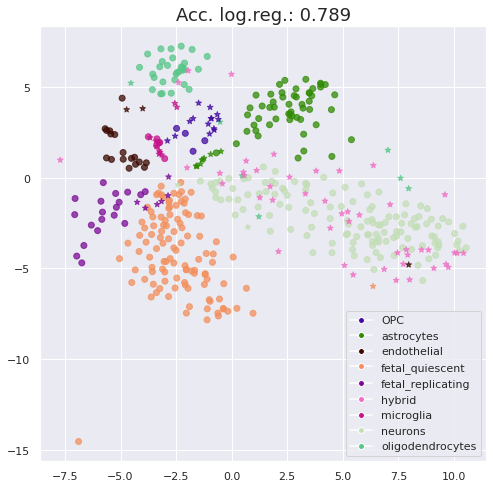

In [28]:
labs_unique = np.unique(labels, return_inverse=True)
fig = plt.figure(figsize=(8,8))

preds, acc, ari = logres_scores(embedding, labs_unique[1], np.ones(N), K=5)
rgba_cols = 0.75*np.ones((N,4))
for k_i in set(labs_unique[1]):
    rgba_cols[labs_unique[1]==k_i,:3] = colors[k_i]
for k_i in set(labs_unique[1]):
    mask = preds==k_i
    mask2 = preds == labs_unique[1]
    mask2 = mask*mask2
    mask3 = preds != labs_unique[1]
    mask3 = mask3*mask
    plt.scatter(embedding[mask2, 0], embedding[mask2, 1], c= rgba_cols[mask2,:], label=labs_unique[0][k_i-1])
    plt.scatter(embedding[mask3, 0], embedding[mask3, 1], c= rgba_cols[mask3,:], label=labs_unique[0][k_i-1], marker='*')
plt.title('Acc. log.reg.: %.3f'%(acc), fontsize=18)
plt.legend(handles = [Line2D([0], [0], marker='o',color='w', markerfacecolor=colors[i], label=np.unique(labels)[i]) for i in set(labs_unique[1])])

plt.savefig('darmanis_tsne_logres.png')
plt.show()

## Nestorowa data-set

In [29]:
data, labels = pickle.load(open('nestorowa.pkl', 'rb'))
N,D = np.shape(data)

In [30]:
order = np.argsort(-np.std(data, axis=0))
data = data[:,order]

### UMAP

In [31]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[:,:500])

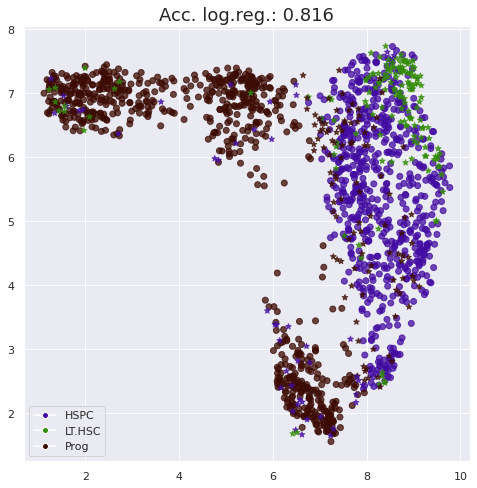

In [33]:
labs_unique = np.unique(labels, return_inverse=True)
fig = plt.figure(figsize=(8,8))
preds, acc, ari = logres_scores(embedding, labs_unique[1], np.ones(N), K=5)
rgba_cols = 0.75*np.ones((N,4))
for k_i in set(labs_unique[1]):
    rgba_cols[labs_unique[1]==k_i,:3] = colors[k_i]
for k_i in set(labs_unique[1]):
    mask = preds==k_i
    mask2 = preds == labs_unique[1]
    mask2 = mask*mask2
    mask3 = preds != labs_unique[1]
    mask3 = mask3*mask
    plt.scatter(embedding[mask2, 0], embedding[mask2, 1], c= rgba_cols[mask2,:], label=labs_unique[0][k_i-1])
    plt.scatter(embedding[mask3, 0], embedding[mask3, 1], c= rgba_cols[mask3,:], label=labs_unique[0][k_i-1], marker='*')
plt.title('Acc. log.reg.: %.3f'%(acc), fontsize=18)
plt.legend(handles = [Line2D([0], [0], marker='o',color='w', markerfacecolor=colors[i], label=np.unique(labels)[i]) for i in set(labs_unique[1])])
plt.savefig('nestorowa_UMAP_logres.png')
plt.show()

### t-SNE

In [34]:
embedding = TSNE(n_components=2, perplexity=50).fit_transform(data)

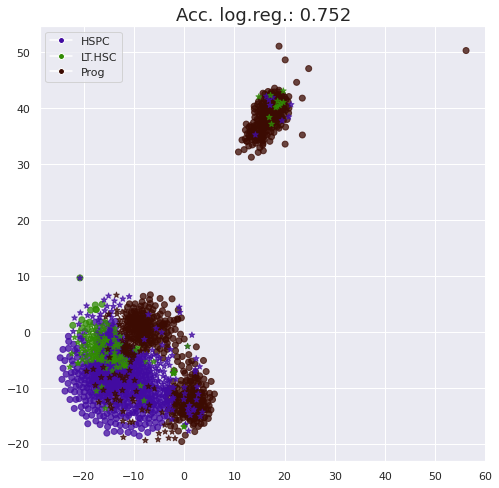

In [36]:
labs_unique = np.unique(labels, return_inverse=True)
fig = plt.figure(figsize=(8,8))

preds, acc, ari = logres_scores(embedding, labs_unique[1], np.ones(N), K=5)
rgba_cols = 0.75*np.ones((N,4))
for k_i in set(labs_unique[1]):
    rgba_cols[labs_unique[1]==k_i,:3] = colors[k_i]
for k_i in set(labs_unique[1]):
    mask = preds==k_i
    mask2 = preds == labs_unique[1]
    mask2 = mask*mask2
    mask3 = preds != labs_unique[1]
    mask3 = mask3*mask
    plt.scatter(embedding[mask2, 0], embedding[mask2, 1], c= rgba_cols[mask2,:], label=labs_unique[0][k_i-1])
    plt.scatter(embedding[mask3, 0], embedding[mask3, 1], c= rgba_cols[mask3,:], label=labs_unique[0][k_i-1], marker='*')
plt.title('Acc. log.reg.: %.3f'%(acc), fontsize=18)

plt.legend(handles = [Line2D([0], [0], marker='o',color='w', markerfacecolor=colors[i], label=np.unique(labels)[i]) for i in set(labs_unique[1])])
plt.savefig('nestorowa_tsne_logres.png')
plt.show()

## Other comparisons

### Time dependency on dimensionality

[0.00850487 3.12353221]
[6.30615641e-03 1.13346090e+01]


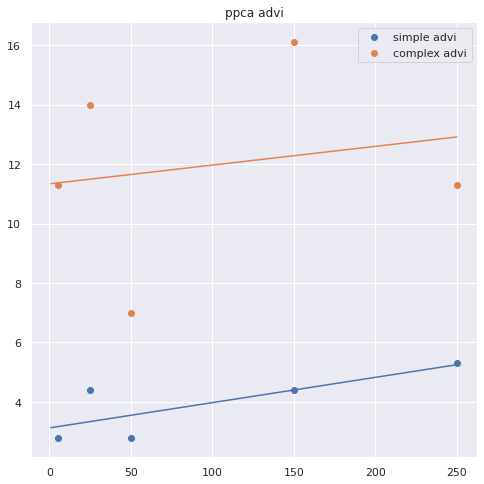

[ 0.87246019 17.0638222 ]
[ 1.47036843 82.06463038]


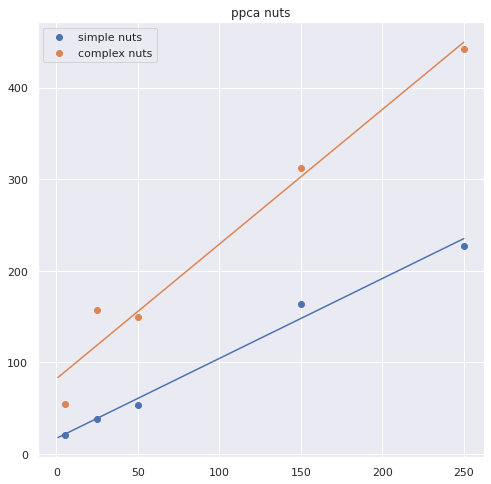

[ 0.85683147 50.96417875]
[ 0.52855717 30.078512  ]


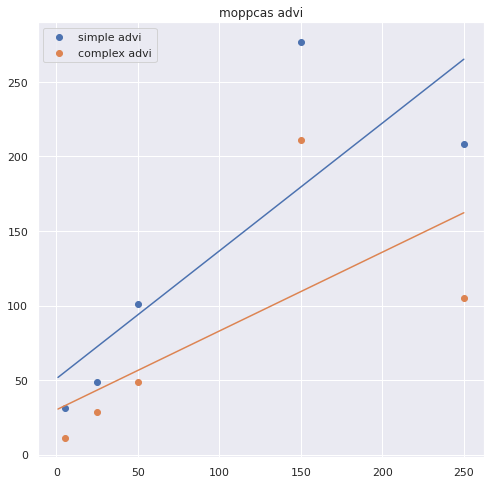

[ 44.45661754 351.48471595]
[  66.1451961  -216.81882577]


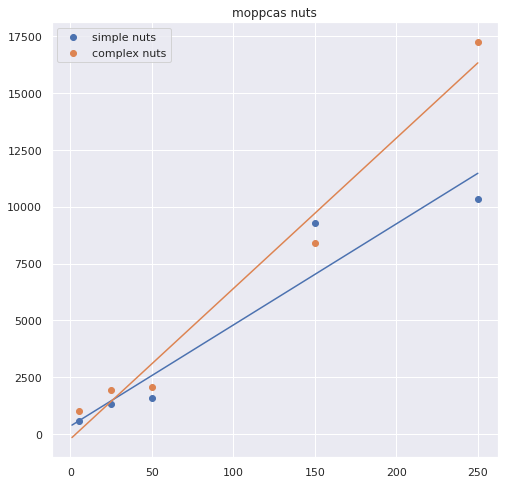

In [4]:
sns.set()
x = [5,25,50,150,250]
x2 = np.linspace(1,250,500)
plt.scatter(x, [2.8, 4.4, 2.8, 4.4, 5.3], label='simple advi')
eq = np.polyfit(x, [2.8, 4.4, 2.8, 4.4, 5.3], 1)
print(eq)
p = np.poly1d(eq)
plt.plot(x2, p(x2))
plt.scatter(x,[11.3,14.0,7.0 , 16.1 , 11.3], label='complex advi')
eq = np.polyfit(x, [11.3,14.0,7.0 , 16.1 , 11.3], 1)
p = np.poly1d(eq)
print(eq)
plt.plot(x2, p(x2))
plt.legend()
plt.title('ppca advi')
plt.show()

plt.scatter(x, [21.1 , 38.7 , 53.6 , 163.3 , 227.4], label='simple nuts')
eq = np.polyfit(x, [21.1 , 38.7 , 53.6 , 163.3 , 227.4], 1)
p = np.poly1d(eq)
plt.plot(x2, p(x2))
print(eq)
plt.scatter(x,[54.8 , 157.0 , 150.1 , 312.5 , 441.7], label='complex nuts')
eq = np.polyfit(x, [54.8 , 157.0 , 150.1 , 312.5 , 441.7], 1)
p = np.poly1d(eq)
print(eq)
plt.plot(x2, p(x2))
plt.legend()
plt.title('ppca nuts')
plt.show()

plt.scatter(x, [31.5 , 48.6 , 101.1 , 276.6 , 208.3], label='simple advi')
eq = np.polyfit(x, [31.5 , 48.6 , 101.1 , 276.6 , 208.3], 1)
p = np.poly1d(eq)
print(eq)
plt.plot(x2, p(x2))
plt.scatter(x,[11.5, 28.3, 48.7 , 210.7,104.9], label='complex advi')
eq = np.polyfit(x, [11.5, 28.3, 48.7 , 210.7,104.9], 1)
p = np.poly1d(eq)
print(eq)
plt.plot(x2, p(x2))
plt.title('moppcas advi')
plt.legend()
plt.show()



plt.scatter(x, [589.7 ,  1313.2 , 1599.9 , 9266.6 , 10327.2], label='simple nuts')
eq = np.polyfit(x, [589.7 ,  1313.2 , 1599.9 , 9266.6 , 10327.2], 1)
p = np.poly1d(eq)
plt.plot(x2, p(x2))
print(eq)
plt.scatter(x,[997.7 , 1945.1 , 2083.9 , 8409.1 , 17229.8], label='complex nuts')
eq = np.polyfit(x, [997.7 , 1945.1 , 2083.9 , 8409.1 , 17229.8], 1)
p = np.poly1d(eq)
print(eq)
plt.plot(x2, p(x2))
plt.title('moppcas nuts')
plt.legend()
plt.show()

### Overal comparison in terms of accuracy

In [14]:
timings_nuts,timings_vb,knots_nuts_try,knots_vb_try,knots_nuts_found,knots_vb_found,acc_scores_nuts,acc_scores_vb = pickle.load(open('comparison1.pkl', 'rb'))

In [15]:
timings_nuts2,timings_vb2,knots_nuts_try2,knots_vb_try2,knots_nuts_found2,knots_vb_found2,acc_scores_nuts2,acc_scores_vb2 = pickle.load(open('comparison2.pkl', 'rb'))

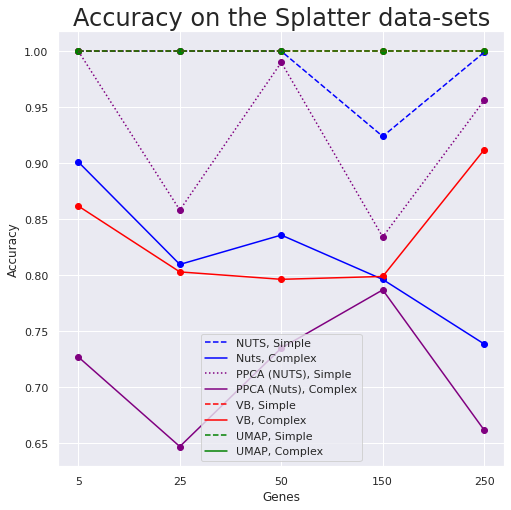

In [16]:
plt.scatter(range(len(acc_scores_nuts)), [max(acc_scores_nuts[i]) for i in range(len(acc_scores_nuts))], c='blue')
plt.plot(range(len(acc_scores_nuts)), [max(acc_scores_nuts[i]) for i in range(len(acc_scores_nuts))], linestyle='--', label='NUTS, Simple', c='blue')
plt.scatter(range(len(acc_scores_nuts2)), [max(acc_scores_nuts2[i]) for i in range(len(acc_scores_nuts2))], c='blue')
plt.plot(range(len(acc_scores_nuts2)), [max(acc_scores_nuts2[i]) for i in range(len(acc_scores_nuts2))], label='Nuts, Complex', c='blue')
plt.xticks(range(len(acc_scores_nuts2)), [5,25, 50,150, 250])
# plt.title('Accuracy of NUTS for the Splatter data-sets')
plt.ylabel('Accuracy')
plt.xlabel('Genes')
# plt.savefig('NUTS_splatter_accuracy.png')
# plt.show()

plt.scatter(range(len(acc_scores_nuts)), [acc_scores_nuts[i][0] for i in range(len(acc_scores_nuts))], c='purple')
plt.plot(range(len(acc_scores_nuts)), [acc_scores_nuts[i][0] for i in range(len(acc_scores_nuts))], linestyle=':', label='PPCA (NUTS), Simple', c='purple')
plt.scatter(range(len(acc_scores_nuts2)), [acc_scores_nuts2[i][0] for i in range(len(acc_scores_nuts2))], c='purple')
plt.plot(range(len(acc_scores_nuts2)), [acc_scores_nuts2[i][0] for i in range(len(acc_scores_nuts2))], label='PPCA (Nuts), Complex', c='purple')
plt.xticks(range(len(acc_scores_nuts2)), [5,25, 50,150, 250])
# plt.title('Accuracy of NUTS for the Splatter data-sets')
plt.ylabel('Accuracy')
plt.xlabel('Genes')


plt.scatter(range(len(acc_scores_vb)), [max(acc_scores_vb[i]) for i in range(len(acc_scores_vb))], c='red')
plt.plot(range(len(acc_scores_vb)), [max(acc_scores_vb[i]) for i in range(len(acc_scores_vb))], linestyle='--', label='VB, Simple', c='red')
plt.scatter(range(len(acc_scores_vb2)), [max(acc_scores_vb2[i]) for i in range(len(acc_scores_vb2))], c='red')
plt.plot(range(len(acc_scores_vb2)), [max(acc_scores_vb2[i]) for i in range(len(acc_scores_vb2))], label='VB, Complex', c='red')
plt.xticks(range(len(acc_scores_vb2)), [5,25, 50,150, 250])
# plt.title('Accuracy of VB for the Splatter data-sets')
# plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Genes')
# plt.savefig('VB_splatter_accuracy.png')

plt.scatter(range(len(scores_UMAP)), scores_UMAP, c='green')
plt.plot(range(len(scores_UMAP)), scores_UMAP, linestyle='--', label='UMAP, Simple', c='green')
plt.scatter(range(len(scores_UMAP2)), scores_UMAP2, c='green')
plt.plot(range(len(scores_UMAP2)), scores_UMAP2, label='UMAP, Complex', c='green')
plt.xticks(range(len(scores_UMAP)), [5,25, 50,150, 250])
plt.title('Accuracy on the Splatter data-sets', fontsize=24)
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Genes')
plt.savefig('UMAP_splatter_accuracy.png')
plt.show()

In [5]:
timings_nuts,timings_vb,knots_nuts_try,knots_vb_try,knots_nuts_found,knots_vb_found,acc_scores_nuts,acc_scores_vb = pickle.load(open('comparison1.pkl', 'rb'))
timings_nuts2,timings_vb2,knots_nuts_try2,knots_vb_try2,knots_nuts_found2,knots_vb_found2,acc_scores_nuts2,acc_scores_vb2 = pickle.load(open('comparison2.pkl', 'rb'))

In [62]:
scores_UMAP = [1.00, 1.00, 1.00, 1.00, 1.00] 
scores_UMAP2 = [0.95,.98,0.98,1.00, 1.00]
ppca_nuts = [1.00,0.88, 0.99,  0.97,  0.94]
ppca_nuts2 = [0.80 , 0.68  ,0.82  ,0.81  ,0.77]
nuts = [1.00 ,1.00 ,1.00,0.97,1.00]
nuts2 = [0.90,  0.82,  0.89,  0.82,  0.77]
ppca_vb = [1.00,0.88,  0.99,  0.96,  0.94]
ppca_vb2 = [0.80,  0.69,  0.81,  0.82,  0.76]
vb  = [1.00, 1.00, 1.00,0.98,1.00]
vb2 = [0.90,  0.91  ,0.90,  0.94,  0.79]
tsne = [1.00, 1.00, 1.00, 1.00, 1.00]
tsne2 = [0.95,0.94,1.00, 1.00, 1.00]

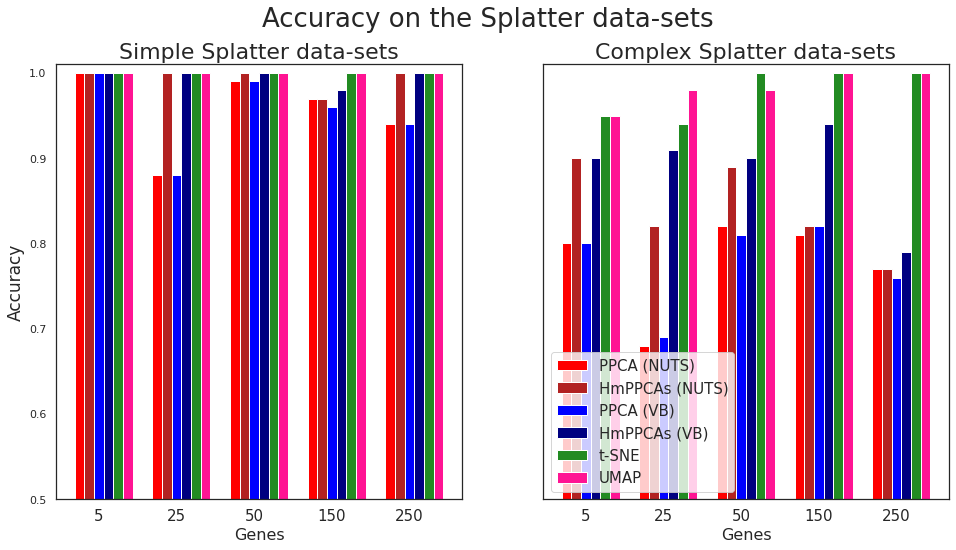

In [63]:
labels = ['5', '25', '50', '150', '250']
x = np.array(range(0,len(labels)*4, 4))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)
rects3 = ax[0].bar(x, ppca_nuts, width, label='PPCA (NUTS)', color='red')
rects1 = ax[0].bar(x + 0.5, nuts, width, label='HmPPCAs (NUTS)',color='firebrick')
rects3 = ax[0].bar(x + 1.0, ppca_vb, width, label='PPCA (VB)', color='blue')
rects2 = ax[0].bar(x + 1.5, vb, width, label='HmPPCAs (VB)', color='navy')
rects3 = ax[0].bar(x + 2.0, tsne, width, label='t-SNE', color='forestgreen')
rects3 = ax[0].bar(x + 2.5, scores_UMAP, width, label='UMAP', color='deeppink')


ax[0].set_ylabel('Accuracy', fontsize=17)
ax[0].set_title('Simple Splatter data-sets', fontsize=22)
ax[0].set_xticks(x+1)
ax[0].set_xlabel('Genes', fontsize=16)
ax[0].set_ylim((0.5,1.01))
ax[0].set_xticklabels(labels, fontsize=15)

rects4 = ax[1].bar(x, ppca_nuts2, width, label='PPCA (NUTS)', color='red')
rects1 = ax[1].bar(x + 0.5, nuts2, width, label='HmPPCAs (NUTS)', color='firebrick')
rects5 = ax[1].bar(x + 1.0, ppca_vb2, width, label='PPCA (VB)', color='blue')
rects2 = ax[1].bar(x + 1.5, vb2, width, label='HmPPCAs (VB)', color='navy')
rects3 = ax[1].bar(x + 2.0, tsne2, width, label='t-SNE', color='forestgreen')
rects3 = ax[1].bar(x + 2.5, scores_UMAP2, width, label='UMAP', color='deeppink')


ax[1].set_title('Complex Splatter data-sets', fontsize=22)
ax[1].set_xticks(x+1)
ax[1].set_xticklabels(labels,fontsize=15)
ax[1].legend(loc='lower left', fontsize=15)
ax[1].set_ylim((0.5,1.01))
ax[1].set_xlabel('Genes', fontsize=16)
plt.suptitle('Accuracy on the Splatter data-sets', fontsize=26)
plt.savefig('Splatter_Accuracy_all.png')
plt.show()

In [18]:
scores_UMAP = [0.82,0.82] 
ppca_nuts = [0.6,0.73]
nuts = [0.7,0.79]
ppca_vb = [0.73,0.73]
vb  = [0.73,0.79]
tsne = [0.76,0.8]

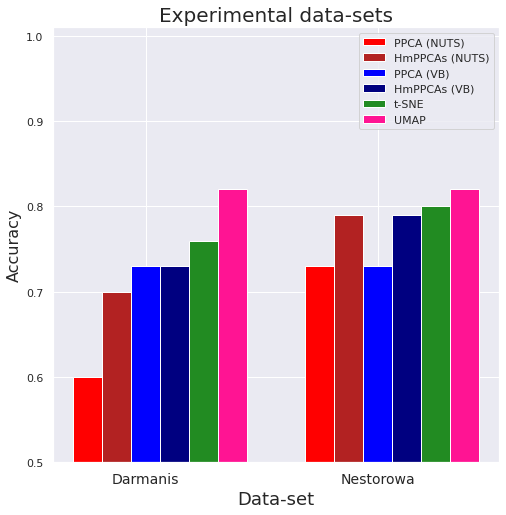

In [19]:
labels = ['5', '25', '50', '150', '250']
# nuts = [max(acc_scores_nuts[i]) for i in range(len(acc_scores_nuts))]
# vb = [max(acc_scores_vb[i]) for i in range(len(acc_scores_nuts))]
# ppca_nuts = [acc_scores_nuts[i][0] for i in range(len(acc_scores_nuts))]
# ppca_vb = [acc_scores_vb[i][0] for i in range(len(acc_scores_nuts))]

x = np.array([0,4])  # the label locations
width = 0.5  # the width of the bars

rects3 = plt.bar(x, ppca_nuts, width, label='PPCA (NUTS)', color='red')
rects1 = plt.bar(x + 0.5, nuts, width, label='HmPPCAs (NUTS)',color='firebrick')
rects3 = plt.bar(x + 1.0, ppca_vb, width, label='PPCA (VB)', color='blue')
rects2 = plt.bar(x + 1.5, vb, width, label='HmPPCAs (VB)', color='navy')
rects3 = plt.bar(x + 2.0, tsne, width, label='t-SNE', color='forestgreen')
rects3 = plt.bar(x + 2.5, scores_UMAP, width, label='UMAP', color='deeppink')


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Accuracy', fontsize=16)
plt.title('Experimental data-sets', fontsize=20)
plt.xticks([1,5],['Darmanis', 'Nestorowa'], fontsize=14)
plt.xlabel('Data-set', fontsize=18)
plt.ylim((0.5,1.01))
plt.legend()
# nuts2 = [max(acc_scores_nuts2[i]) for i in range(len(acc_scores_nuts2))]
# vb2 = [max(acc_scores_vb2[i]) for i in range(len(acc_scores_nuts2))]
# ppca_nuts2 = [acc_scores_nuts2[i][0] for i in range(len(acc_scores_nuts2))]
# ppca_vb2 = [acc_scores_vb2[i][0] for i in range(len(acc_scores_nuts2))]
plt.savefig('Splatter_Accuracy_exp.png')
plt.show()